In this file I am considering the collection "aggregated_o_d_event" inside our database.

Then I have extracted from this collection the list of all the providers of each ondemand event.

In [11]:
import pymongo
import matplotlib.pyplot as plt #useful for plotting
import json
import numpy as np
client = pymongo.MongoClient('localhost', 27017)
db = client.phoenix
collection = db.phoenix

db.aggregated_o_d_event.find_one()
db.aggregated_o_d_event.distinct("location.name")
#all the different providers of on deman events
providers = db.aggregated_o_d_event.distinct("location.name")
providers

[u'NowTV',
 u'demand5',
 u'Netflix',
 u'Film4OD',
 u'BlinkBox',
 u'ITunes',
 u'Amazon',
 u'BBCIplayer',
 u'4onDemand',
 u'BTVision',
 u'GooglePlay',
 u'ITVPlayer',
 u'Youtube']

In the following, we have counted the number of ondemand events for each of the provider listed above.

In [33]:
events_per_provider = {}
for i in providers:
    num_events = db.aggregated_o_d_event.find({"location.name" : i}).count()
    events_per_provider[i] = num_events

events_per_provider

{u'4onDemand': 889,
 u'Amazon': 25131,
 u'BBCIplayer': 4448,
 u'BTVision': 343,
 u'BlinkBox': 19834,
 u'Film4OD': 171,
 u'GooglePlay': 16351,
 u'ITVPlayer': 128,
 u'ITunes': 24487,
 u'Netflix': 419,
 u'NowTV': 763,
 u'Youtube': 2913,
 u'demand5': 3137}

Below, it is just an exercise that shows how to sort the dictionary based on the increasing order of its values.

In [9]:
from operator import itemgetter
sorted(events_per_provider.items(), key=itemgetter(1))

[(u'ITVPlayer', 128),
 (u'Film4OD', 171),
 (u'BTVision', 343),
 (u'Netflix', 419),
 (u'NowTV', 763),
 (u'4onDemand', 889),
 (u'Youtube', 2913),
 (u'demand5', 3137),
 (u'BBCIplayer', 4448),
 (u'GooglePlay', 16351),
 (u'BlinkBox', 19834),
 (u'ITunes', 24487),
 (u'Amazon', 25131)]

Populating the interactive namespace from numpy and matplotlib


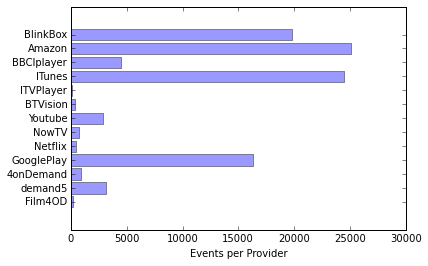

In [34]:
%pylab inline
data = events_per_provider
x = data.keys()
y = data.values()
X = np.arange(len(data))
plt.barh(X,y,align='center', alpha=0.4)
plt.yticks(X, x)
plt.xlabel("Events per Provider")
plt.show()